<a href="https://colab.research.google.com/github/marcochisci/Anomaly_detection/blob/main/One_Week_Anomaly_Dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airquino Table Data of 1 day
Getting all the datas of the week 20/09/2021 - 27/09/2021

In [1]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query = """select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-09-20 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-09-27 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 49 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float); """.format(29510692, 23284701)  #23284701 is a specific station

df = pd.read_sql(query, conn)
df= df.set_index('Dates')

#removing nans
df = df.dropna()

display(df)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-09-20 00:00:00,577.0,1.0,714.0,3325.0,190.0,4.0,819.0,83.0,200.0,426.0
2021-09-20 00:01:00,575.0,1.0,714.0,3312.0,189.0,4.0,829.0,81.0,201.0,426.0
2021-09-20 00:02:00,573.0,1.0,713.0,3312.0,188.0,4.0,825.0,77.0,200.0,416.0
2021-09-20 00:03:00,571.0,1.0,712.0,3300.0,187.0,3.0,831.0,74.0,200.0,406.0
2021-09-20 00:05:00,567.0,1.0,709.0,3300.0,186.0,4.0,834.0,76.0,200.0,421.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-26 23:56:00,688.0,9.0,750.0,3243.0,180.0,13.0,999.0,152.0,237.0,493.0
2021-09-26 23:57:00,687.0,10.0,745.0,3243.0,180.0,18.0,999.0,138.0,237.0,489.0
2021-09-26 23:58:00,687.0,10.0,743.0,3243.0,180.0,14.0,999.0,136.0,236.0,488.0


Plots

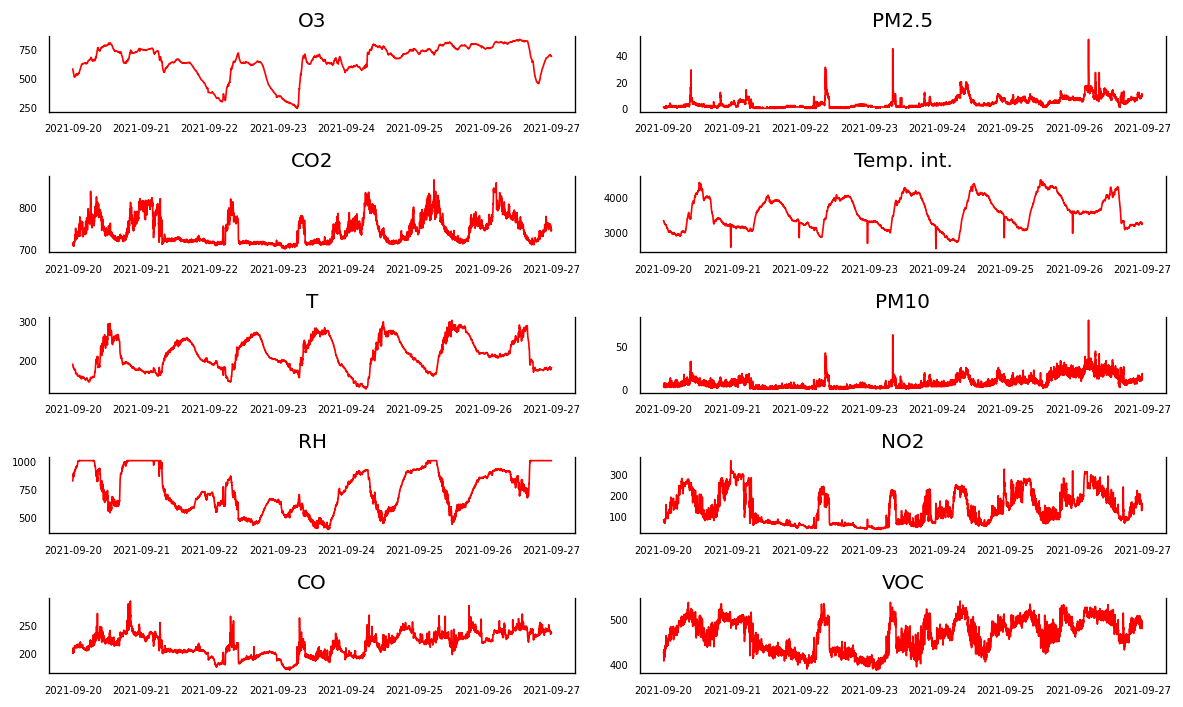

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

You can also use the next cell to get an average of all the values in a choosen timeframe (you can choose it by changing "1 hour" to whatever you want)

,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC
Dates,,,,,,,,,,
2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245
2021-09-20 01:00:00,531.047619,1.288889,733.547619,3073.380952,252.957447,4.444444,961.723404,107.095238,211.571429,452.809524
2021-09-20 02:00:00,567.854167,1.549020,746.229167,3008.979167,252.462963,5.058824,998.425926,146.500000,212.916667,470.437500
2021-09-20 03:00:00,620.244898,1.094340,746.408163,2970.244898,234.500000,4.490566,999.000000,154.632653,210.877551,474.306122
2021-09-20 04:00:00,626.176471,1.018519,748.313725,2929.862745,228.375000,5.425926,999.000000,161.843137,206.411765,475.549020
...,...,...,...,...,...,...,...,...,...,...
2021-09-26 20:00:00,547.295455,7.319149,735.340909,3205.613636,260.224490,9.595745,999.000000,133.545455,241.795455,484.931818
2021-09-26 21:00:00,625.612245,6.537037,746.081633,3211.938776,267.254545,8.629630,999.000000,155.857143,237.040816,490.959184
2021-09-26 22:00:00,674.230769,9.236364,756.557692,3235.480769,263.431034,11.890909,999.000000,186.134615,240.076923,500.326923


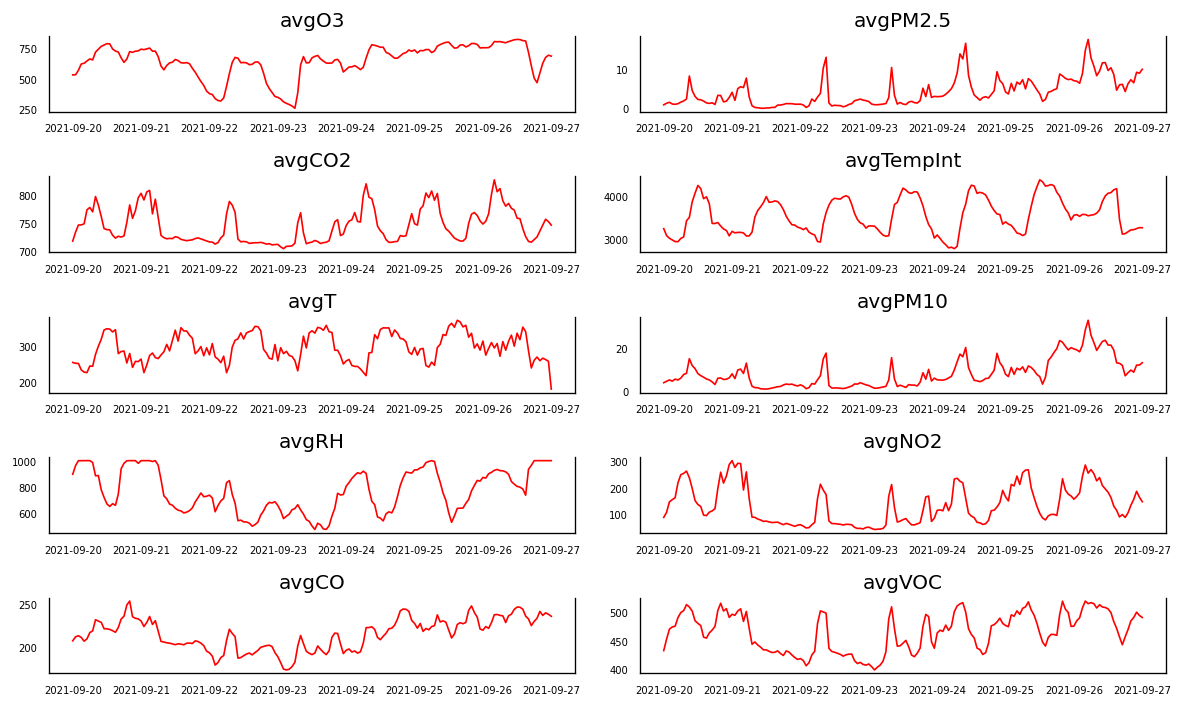

In [3]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 hour', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from columnvalues1week c 
group by bucket
order by bucket asc;
 """

timebucket = pd.read_sql(query, conn)
timebucket= timebucket.rename(columns={'bucket': 'Dates'})
timebucket=timebucket.set_index('Dates')
display(timebucket)

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = timebucket[timebucket.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(timebucket.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing stationarity 

Test first 3 colums: O3, PM2.5, CO2

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]                   
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results1 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[0:3]].columns
}
adf_test_results1    

{'CO2': 'Stationary', 'O3': 'Stationary', 'PM2.5': 'Stationary'}

Test T, Temp. int. and PM10

In [10]:
adf_test_results2 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[3:6]].columns
}
adf_test_results2   

{'PM10': 'Stationary', 'T': 'Stationary', 'Temp. int.': 'Stationary'}

Test RH, NO2, CO and VOC

In [11]:
adf_test_results3 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[6:10]].columns
}
adf_test_results3   

{'CO': 'Stationary',
 'NO2': 'Stationary',
 'RH': 'Stationary',
 'VOC': 'Stationary'}

Converting to stationary with differencing

In [7]:
#before differencing
df_copy= df.copy()

In [8]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df.columns:
    df[col] = differencing(df, col, 1)

Test for stationarity now

# VAR model

Finding the best lag for VAR model

In [12]:
from statsmodels.tsa.api import VAR
max_lag = 40
var_model = VAR(df)
# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


16


Finding anomalies

In [13]:
import numpy as np

#0 means that is it not an anomaly
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(df)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
data = df_copy.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-09-20 00:21:00,534.0,1.0,716.0,3243.0,180.0,3.0,892.0,81.0,207.0,424.0,0
2021-09-20 00:22:00,533.0,1.0,717.0,3243.0,180.0,2.0,890.0,77.0,207.0,415.0,0
2021-09-20 00:23:00,531.0,1.0,712.0,3243.0,179.0,7.0,868.0,74.0,205.0,424.0,0
2021-09-20 00:26:00,525.0,0.0,708.0,3237.0,179.0,2.0,858.0,68.0,201.0,416.0,0
2021-09-20 00:27:00,523.0,1.0,707.0,3231.0,179.0,3.0,859.0,70.0,202.0,420.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 23:56:00,688.0,9.0,750.0,3243.0,180.0,13.0,999.0,152.0,237.0,493.0,0
2021-09-26 23:57:00,687.0,10.0,745.0,3243.0,180.0,18.0,999.0,138.0,237.0,489.0,0
2021-09-26 23:58:00,687.0,10.0,743.0,3243.0,180.0,14.0,999.0,136.0,236.0,488.0,0


In [15]:
data['Predictions'].value_counts()

0    7734
1      72
Name: Predictions, dtype: int64

Forecasting the values using the var model

In [16]:
forecast_input = df.values[-selected_lag:]
forecast = var_fitresults.forecast(forecast_input, steps=len(df)-selected_lag)
print(forecast)

[[-5.45631441e-01  5.93507857e-02  8.69163710e-01 ...  1.07522866e+00
   1.31518557e+00  5.06117446e-01]
 [-6.19929757e-01 -3.07315008e-02  1.69096234e-01 ... -1.40251585e+00
  -2.50568498e-01 -6.78055946e-01]
 [-3.03520026e-01 -2.05947244e-01 -5.05319560e-01 ... -1.30793985e+00
  -2.45550144e-01  2.52844980e-01]
 ...
 [ 2.25937962e-02  1.01756707e-03  3.92784845e-03 ...  7.21316861e-03
   3.67004686e-03  7.73773715e-03]
 [ 2.25937962e-02  1.01756707e-03  3.92784845e-03 ...  7.21316861e-03
   3.67004686e-03  7.73773715e-03]
 [ 2.25937962e-02  1.01756707e-03  3.92784845e-03 ...  7.21316861e-03
   3.67004686e-03  7.73773715e-03]]


Making it a dataframe

In [17]:
df_forecast = pd.DataFrame(forecast, index=df_copy.index[-(len(df_copy)-selected_lag):], columns=df.columns)


Reverting the differencing

In [18]:
df_train= df_copy[0:-(len(df_copy)-selected_lag)]
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc
pred = invert_transformation(df_train, df_forecast, second_diff=False)
display(pred)     


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-09-20 00:21:00,534.454369,1.059351,712.869164,3242.235210,180.966326,4.585394,889.785857,83.075229,206.315186,431.506117
2021-09-20 00:22:00,533.834439,1.028619,713.038260,3241.858441,180.940968,4.020537,889.040464,81.672713,206.064617,430.828061
2021-09-20 00:23:00,533.530919,0.822672,712.532940,3245.135723,180.863165,4.125898,888.739060,80.364773,205.819067,431.080906
2021-09-20 00:26:00,533.110601,0.973604,712.285950,3245.683112,180.591618,4.518503,888.505164,80.074560,205.319389,430.952535
2021-09-20 00:27:00,532.620122,1.068476,712.612474,3242.405878,180.274499,4.679845,889.634814,82.034529,205.590147,431.694677
...,...,...,...,...,...,...,...,...,...,...
2021-09-26 23:56:00,704.228516,9.058790,744.071172,3317.544900,184.433227,12.703323,984.362680,138.132809,234.717709,491.723626
2021-09-26 23:57:00,704.251110,9.059808,744.075099,3317.555887,184.433889,12.704347,984.374345,138.140022,234.721380,491.731364
2021-09-26 23:58:00,704.273704,9.060825,744.079027,3317.566874,184.434552,12.705372,984.386009,138.147235,234.725050,491.739102


Creating a data frame with all the informations:
on the left side there are the actual values and on the right side there are the predicted values;
0 means it is not an anomaly and 1 means it is

In [19]:
data.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
results=pd.concat([data, pred], axis=1)
results['Dates'] = df.index[selected_lag:]
# fix data
data['Dates']=df.index[selected_lag:]
data=data.set_index('Dates')
#print results
results=results.set_index('Dates')
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-09-20 00:21:00,534.0,1.0,716.0,3243.0,180.0,3.0,892.0,81.0,207.0,424.0,0,534.454369,1.059351,712.869164,3242.235210,180.966326,4.585394,889.785857,83.075229,206.315186,431.506117
2021-09-20 00:22:00,533.0,1.0,717.0,3243.0,180.0,2.0,890.0,77.0,207.0,415.0,0,533.834439,1.028619,713.038260,3241.858441,180.940968,4.020537,889.040464,81.672713,206.064617,430.828061
2021-09-20 00:23:00,531.0,1.0,712.0,3243.0,179.0,7.0,868.0,74.0,205.0,424.0,0,533.530919,0.822672,712.532940,3245.135723,180.863165,4.125898,888.739060,80.364773,205.819067,431.080906
2021-09-20 00:26:00,525.0,0.0,708.0,3237.0,179.0,2.0,858.0,68.0,201.0,416.0,0,533.110601,0.973604,712.285950,3245.683112,180.591618,4.518503,888.505164,80.074560,205.319389,430.952535
2021-09-20 00:27:00,523.0,1.0,707.0,3231.0,179.0,3.0,859.0,70.0,202.0,420.0,0,532.620122,1.068476,712.612474,3242.405878,180.274499,4.679845,889.634814,82.034529,205.590147,431.694677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 23:56:00,688.0,9.0,750.0,3243.0,180.0,13.0,999.0,152.0,237.0,493.0,0,704.228516,9.058790,744.071172,3317.544900,184.433227,12.703323,984.362680,138.132809,234.717709,491.723626
2021-09-26 23:57:00,687.0,10.0,745.0,3243.0,180.0,18.0,999.0,138.0,237.0,489.0,0,704.251110,9.059808,744.075099,3317.555887,184.433889,12.704347,984.374345,138.140022,234.721380,491.731364
2021-09-26 23:58:00,687.0,10.0,743.0,3243.0,180.0,14.0,999.0,136.0,236.0,488.0,0,704.273704,9.060825,744.079027,3317.566874,184.434552,12.705372,984.386009,138.147235,234.725050,491.739102


This are the detected anomalies

In [20]:
anomalies = results[(results['Predictions'] == 1)]
anomalies

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,,,,,,,,,,,,
2021-09-20 02:28:00,564.0,1.0,767.0,3025.0,159.0,6.0,999.0,182.0,210.0,482.0,1,530.136876,1.216875,713.801112,3232.928091,179.331325,4.809525,894.458885,82.543075,206.434785,432.094280
2021-09-20 08:40:00,744.0,2.0,808.0,3512.0,205.0,7.0,850.0,271.0,270.0,538.0,1,536.876268,1.521671,714.977598,3236.164460,179.525341,5.116562,897.965337,84.704869,207.533672,434.410207
2021-09-20 09:06:00,745.0,3.0,781.0,3406.0,184.0,7.0,910.0,221.0,223.0,501.0,1,537.260362,1.538970,715.044372,3236.351238,179.536605,5.133975,898.163630,84.827493,207.596063,434.541749
2021-09-20 11:09:00,775.0,4.0,745.0,4012.0,258.0,13.0,671.0,221.0,223.0,517.0,1,539.564929,1.642761,715.445012,3237.471908,179.604190,5.238450,899.353387,85.563236,207.970408,435.330998
2021-09-20 11:11:00,776.0,3.0,743.0,4043.0,265.0,7.0,633.0,153.0,220.0,486.0,1,539.610117,1.644797,715.452868,3237.493882,179.605515,5.240499,899.376715,85.577662,207.977748,435.346473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 19:10:00,754.0,8.0,750.0,4031.0,263.0,27.0,664.0,213.0,264.0,525.0,1,673.433172,7.671846,738.717514,3302.569668,183.530102,11.307244,968.464263,128.301260,229.715436,481.177091
2021-09-25 21:08:00,789.0,7.0,754.0,3756.0,233.0,18.0,779.0,161.0,237.0,498.0,1,675.466613,7.763427,739.071021,3303.558495,183.589736,11.399429,969.514048,128.950445,230.045740,481.873487
2021-09-25 23:33:00,758.0,7.0,769.0,2975.0,218.0,22.0,847.0,313.0,235.0,493.0,1,678.087494,7.881465,739.526651,3304.832983,183.666597,11.518244,970.867105,129.787172,230.471465,482.771065


Comparing the actual values and the predicted values

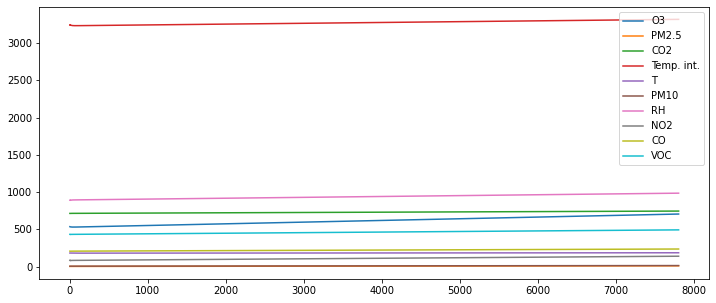

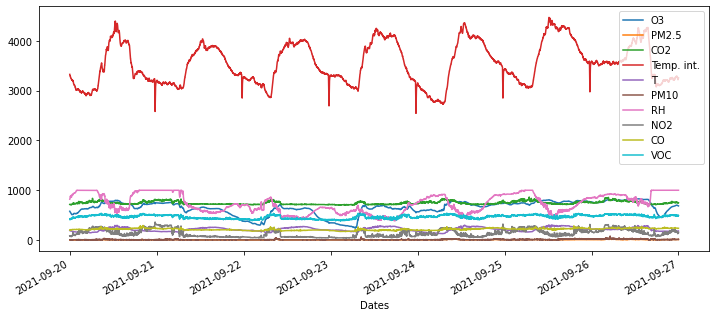

In [21]:
pred.plot(figsize=(12,5),legend=True)
df_copy.plot(figsize=(12,5),legend=True)

Creating a data frame with the actual values and the avg values 

In [22]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select * 
from columnvalues1week c join timebucket1week1hour t on c."Dates" BETWEEN t.bucket AND t.bucket + interval '1 hour'
 """

average_values = pd.read_sql(query, conn)
average_values=average_values.set_index('Dates')


In [23]:
average_values = average_values.iloc[selected_lag:, :]
average_values['Predictions'] = data['Predictions']
display(average_values)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-09-20 00:18:00,539.0,0.0,709.0,3250.0,181.0,3.0,858.0,70.0,201.0,418.0,2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245,NaN
2021-09-20 00:19:00,537.0,1.0,710.0,3243.0,181.0,3.0,872.0,76.0,202.0,424.0,2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245,NaN
2021-09-20 00:20:00,535.0,1.0,712.0,3243.0,181.0,4.0,889.0,82.0,205.0,431.0,2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245,NaN
2021-09-20 00:21:00,534.0,1.0,716.0,3243.0,180.0,3.0,892.0,81.0,207.0,424.0,2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245,0.0
2021-09-20 00:22:00,533.0,1.0,717.0,3243.0,180.0,2.0,890.0,77.0,207.0,415.0,2021-09-20 00:00:00,530.122449,0.886792,717.346939,3235.959184,255.314815,3.773585,895.055556,88.040816,206.857143,432.612245,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26 23:57:00,687.0,10.0,745.0,3243.0,180.0,18.0,999.0,138.0,237.0,489.0,2021-09-26 23:00:00,692.531915,8.980392,752.234043,3259.021277,258.576923,11.921569,999.000000,163.787234,238.425532,494.468085,0.0
2021-09-26 23:58:00,687.0,10.0,743.0,3243.0,180.0,14.0,999.0,136.0,236.0,488.0,2021-09-26 23:00:00,692.531915,8.980392,752.234043,3259.021277,258.576923,11.921569,999.000000,163.787234,238.425532,494.468085,0.0
2021-09-26 23:59:00,686.0,10.0,743.0,3250.0,181.0,14.0,999.0,144.0,235.0,491.0,2021-09-26 23:00:00,692.531915,8.980392,752.234043,3259.021277,258.576923,11.921569,999.000000,163.787234,238.425532,494.468085,0.0


These are the anomalies

In [24]:
anomalies_average = average_values[(average_values['Predictions'] == 1)]
anomalies_average

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-09-20 02:28:00,564.0,1.0,767.0,3025.0,159.0,6.0,999.0,182.0,210.0,482.0,2021-09-20 02:00:00,567.854167,1.549020,746.229167,3008.979167,252.462963,5.058824,998.425926,146.500000,212.916667,470.437500,1.0
2021-09-20 08:40:00,744.0,2.0,808.0,3512.0,205.0,7.0,850.0,271.0,270.0,538.0,2021-09-20 08:00:00,717.933333,2.382979,797.244444,3419.377778,277.880000,8.127660,883.840000,261.688889,231.888889,513.600000,1.0
2021-09-20 09:06:00,745.0,3.0,781.0,3406.0,184.0,7.0,910.0,221.0,223.0,501.0,2021-09-20 09:00:00,741.720000,8.272727,781.900000,3501.440000,300.631579,14.854545,885.631579,236.740000,230.340000,509.400000,1.0
2021-09-20 11:09:00,775.0,4.0,745.0,4012.0,258.0,13.0,671.0,221.0,223.0,517.0,2021-09-20 11:00:00,777.020833,3.037736,739.833333,4071.270833,345.981818,10.264151,719.781818,151.208333,221.312500,485.166667,1.0
2021-09-20 11:11:00,776.0,3.0,743.0,4043.0,265.0,7.0,633.0,153.0,220.0,486.0,2021-09-20 11:00:00,777.020833,3.037736,739.833333,4071.270833,345.981818,10.264151,719.781818,151.208333,221.312500,485.166667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 19:10:00,754.0,8.0,750.0,4031.0,263.0,27.0,664.0,213.0,264.0,525.0,2021-09-25 19:00:00,770.333333,8.785714,749.235294,4000.000000,325.803571,23.250000,703.839286,156.450980,243.156863,495.980392,1.0
2021-09-25 21:08:00,789.0,7.0,754.0,3756.0,233.0,18.0,779.0,161.0,237.0,498.0,2021-09-25 21:00:00,789.037736,7.672414,768.490566,3699.962264,295.568966,20.568966,810.500000,190.735849,240.528302,505.716981,1.0
2021-09-25 23:33:00,758.0,7.0,769.0,2975.0,218.0,22.0,847.0,313.0,235.0,493.0,2021-09-25 23:00:00,752.361702,7.470588,753.500000,3439.234043,289.596154,19.941176,843.019231,168.531915,220.893617,475.297872,1.0
